In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
torch.cuda.set_device(0)
torch.manual_seed(4)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pyplot as plt
from collections import defaultdict

class PlotHelper():
    def __init__(self):
        self.reset()

    def reset(self):
        self._f = None
        self._ax = None
        self.kvals = defaultdict(list)

    def add(self, **kval):
        for k, v in kval.items():
            self.kvals[k].append(v)

    @property
    def fig(self):
        if self._f is None:
            self.new()
        return self._f

    @property
    def ax(self):
        if self._ax is None:
            self.new()
        return self._ax

    def new(self):
        self._f, self._ax = plt.subplots(1,1)
        plt.ion()
        self.fig.show()

    def show(self):
        names = []
        self.ax.clear()
        for k, v in self.kvals.items():
            names.append(k)
            self.ax.plot(v)
        self.ax.legend(names)
        self.fig.canvas.draw()

In [3]:
class SudokuSolver(nn.Module):
    def __init__(self, board_size):
        super().__init__()
        self.W = torch.nn.Parameter(torch.rand((1,9,9,9)))
        
    def __call__(self, X):
        
        return self.W

In [4]:
def process_inputs(X):
    is_input = X.sum(dim=3, keepdim=True)
    
    X = X.view(X.size(0), -1)
#     Y = Y.view(Y.size(0), -1)
    is_input = is_input.view(is_input.size(0), -1)
    
    return is_input

In [5]:
def show_sudoku(X):
    return (torch.argmax(X, 2) + 1) * (X.sum(2).long())

In [6]:
def isvalid_sudoku(X):
    return all([len(X[:, i].unique()) == 9 for i in range(9)])

In [7]:
def partial_sudoku(X):
    return any([len(X[:, i].unique()) == 9 for i in range(9)])

In [8]:
# def get_all_constraint():
#     for i in range(10):
#         yield lambda X, i=i: len(X[:, i].unique()) == 9

def isvalid_sudoku_row_01(X):
    return len(X[:, 0].unique()) == 9 and len(X[:, 1].unique()) == 9

def isvalid_sudoku_row(X):
    return len(X.unique()) == 9

def isvalid_sudoku_col(X):
    return len(X[:, :, 0].unique()) == 9
def isvalid_sudoku_col_1(X):
    return len(X[:, :, 1].unique()) == 9
def isvalid_sudoku_col_2(X):
    return len(X[:, :, 2].unique()) == 9
def isvalid_sudoku_col_3(X):
    return len(X[:, :, 3].unique()) == 9
def isvalid_sudoku_col_4(X):
    return len(X[:, :, 4].unique()) == 9
def isvalid_sudoku_col_5(X):
    return len(X[:, :, 5].unique()) == 9
def isvalid_sudoku_col_6(X):
    return len(X[:, :, 6].unique()) == 9
def isvalid_sudoku_col_7(X):
    return len(X[:, :, 7].unique()) == 9
def isvalid_sudoku_col_8(X):
    return len(X[:, :, 8].unique()) == 9

def isvalid_sudoku_sqr_0(X):
    return len(X[:, 0:3, 0:3].unique()) == 9
def isvalid_sudoku_sqr_1(X):
    return len(X[:, 0:3, 3:6].unique()) == 9
def isvalid_sudoku_sqr_2(X):
    return len(X[:, 0:3, 6:9].unique()) == 9
def isvalid_sudoku_sqr_3(X):
    return len(X[:, 3:6, 0:3].unique()) == 9
def isvalid_sudoku_sqr_4(X):
    return len(X[:, 3:6, 3:6].unique()) == 9
def isvalid_sudoku_sqr_5(X):
    return len(X[:, 3:6, 6:9].unique()) == 9
def isvalid_sudoku_sqr_6(X):
    return len(X[:, 6:9, 0:3].unique()) == 9
def isvalid_sudoku_sqr_7(X):
    return len(X[:, 6:9, 3:6].unique()) == 9
def isvalid_sudoku_sqr_8(X):
    return len(X[:, 6:9, 6:9].unique()) == 9

In [9]:
X= torch.tensor([[6, 4, 0, 1, 0, 0, 8, 5, 9],
                 [8, 9, 5, 6, 0, 4, 2, 7, 0],
                 [0, 0, 0, 9, 0, 5, 0, 3, 4],
                 [0, 3, 6, 0, 4, 8, 9, 2, 0],
                 [9, 0, 2, 3, 0, 7, 0, 6, 5],
                 [0, 7, 4, 0, 9, 6, 0, 8, 0],
                 [4, 6, 0, 0, 2, 3, 5, 0, 8],
                 [0, 0, 7, 0, 0, 9, 0, 4, 0],
                 [3, 0, 8, 4, 0, 1, 0, 0, 0],
                 ])

Y= torch.tensor([[6, 4, 3, 1, 7, 2, 8, 5, 9],
                 [8, 9, 5, 6, 3, 4, 2, 7, 1],
                 [7, 2, 1, 9, 8, 5, 6, 3, 4],
                 [1, 3, 6, 5, 4, 8, 9, 2, 7],
                 [9, 8, 2, 3, 1, 7, 4, 6, 5],
                 [5, 7, 4, 2, 9, 6, 1, 8, 3],
                 [4, 6, 9, 7, 2, 3, 5, 1, 8],
                 [2, 1, 7, 8, 5, 9, 3, 4, 6],
                 [3, 5, 8, 4, 6, 1, 7, 9, 2],
                 ])

In [10]:
X_ = torch.zeros((9,9,9))
for i in range(9):
    for j in range(9):
        if X[i][j].item() > 0:
            X_[i][j][X[i][j].item() - 1] = 1        
            
Y_ = torch.zeros((9,9,9))
for i in range(9):
    for j in range(9):
        if Y[i][j].item() > 0:
            Y_[i][j][Y[i][j].item() - 1] = 1
            
X = X_.unsqueeze(0)
Y = Y_

is_input = process_inputs(X)

In [11]:
# Input
print(show_sudoku(X[0])) # Shape of X_in: (BxHxWxC)

tensor([[6, 4, 0, 1, 0, 0, 8, 5, 9],
        [8, 9, 5, 6, 0, 4, 2, 7, 0],
        [0, 0, 0, 9, 0, 5, 0, 3, 4],
        [0, 3, 6, 0, 4, 8, 9, 2, 0],
        [9, 0, 2, 3, 0, 7, 0, 6, 5],
        [0, 7, 4, 0, 9, 6, 0, 8, 0],
        [4, 6, 0, 0, 2, 3, 5, 0, 8],
        [0, 0, 7, 0, 0, 9, 0, 4, 0],
        [3, 0, 8, 4, 0, 1, 0, 0, 0]])


In [12]:
# Groundtruth
print(show_sudoku(Y))

tensor([[6, 4, 3, 1, 7, 2, 8, 5, 9],
        [8, 9, 5, 6, 3, 4, 2, 7, 1],
        [7, 2, 1, 9, 8, 5, 6, 3, 4],
        [1, 3, 6, 5, 4, 8, 9, 2, 7],
        [9, 8, 2, 3, 1, 7, 4, 6, 5],
        [5, 7, 4, 2, 9, 6, 1, 8, 3],
        [4, 6, 9, 7, 2, 3, 5, 1, 8],
        [2, 1, 7, 8, 5, 9, 3, 4, 6],
        [3, 5, 8, 4, 6, 1, 7, 9, 2]])


In [13]:
import sys
sys.path.append("..")


multipliers = torch.tensor([0]*27)

import torch.optim as optim
from pylon.constraint import constraint
from pylon.sampling_solver import WeightedSamplingSolver

model = SudokuSolver(9)#.cuda()
# model.convolutions[-1].register_backward_hook(backward_hook)
sudoku_constraint = constraint(isvalid_sudoku, WeightedSamplingSolver(num_samples=1000))
sudoku_partial_constraint = constraint(partial_sudoku, WeightedSamplingSolver(num_samples=1000))
optimizer = optim.Adam(list(model.parameters()) + list(multipliers), lr=0.01)

row01_constraint = constraint(isvalid_sudoku_row_01, WeightedSamplingSolver(num_samples=200))

row_constraint = constraint(isvalid_sudoku_row, WeightedSamplingSolver(num_samples=2000))

In [14]:
from tqdm import tqdm

input = show_sudoku(X[0])
X = X
is_input = is_input[0]    

In [15]:
plot_loss = PlotHelper()

epsilon = 0.0

for epoch in tqdm(range(220)):
    losses = []
    
    optimizer.zero_grad()
    
    output = model(X[:1])
    loss = F.cross_entropy(output.view(-1,9), Y.argmax(dim=2).view(-1), reduction='none') * is_input
    
    for i in range(0, 9):
        losses += [row_constraint(output[:, i], input=(input[i,:], ))]
        losses += [row_constraint(output[:, :, i], input=(input[:,i], ))]

    for i in range(0, 9, 3):
        for j in range(0, 9, 3):
            losses += [row_constraint(output[:, i:i+3, j:j+3].reshape(1,9,9), input=(input[i:i+3, j:j+3].reshape(9), ))]
            
    losses = epsilon - torch.stack(losses)
    
    with torch.no_grad():
        dampeners = 10 * losses
    
    total_loss = loss.sum() - ((multipliers - dampeners) * losses).sum()
    recon_loss = (output[0].argmax(dim =-1) != Y.argmax(dim=-1)).sum()
    print(recon_loss)
    
    plot_loss.add(recon_loss = recon_loss)

    total_loss.backward()

    optimizer.step()
    
    with torch.no_grad():
        for multiplier in multipliers:
            if multiplier < 0:
                multiplier = 0

  0%|          | 0/220 [00:00<?, ?it/s]

tensor(70)


  0%|          | 1/220 [00:03<12:04,  3.31s/it]

tensor(70)


  1%|          | 2/220 [00:07<12:45,  3.51s/it]

tensor(69)


  1%|▏         | 3/220 [00:11<13:20,  3.69s/it]

tensor(67)


  2%|▏         | 4/220 [00:15<13:25,  3.73s/it]

tensor(66)


  2%|▏         | 5/220 [00:19<13:36,  3.80s/it]

tensor(65)


  3%|▎         | 6/220 [00:23<13:37,  3.82s/it]

tensor(63)


  3%|▎         | 7/220 [00:26<13:34,  3.83s/it]

tensor(63)


  4%|▎         | 8/220 [00:30<13:39,  3.86s/it]

tensor(59)


  4%|▍         | 9/220 [00:34<13:36,  3.87s/it]

tensor(58)


  5%|▍         | 10/220 [00:38<13:35,  3.88s/it]

tensor(56)


  5%|▌         | 11/220 [00:42<13:31,  3.88s/it]

tensor(55)


  5%|▌         | 12/220 [00:46<13:30,  3.90s/it]

tensor(55)


  6%|▌         | 13/220 [00:50<13:29,  3.91s/it]

tensor(52)


  6%|▋         | 14/220 [00:54<13:26,  3.92s/it]

tensor(52)


  7%|▋         | 15/220 [00:58<13:25,  3.93s/it]

tensor(52)


  7%|▋         | 16/220 [01:02<13:20,  3.93s/it]

tensor(51)


  8%|▊         | 17/220 [01:06<13:20,  3.94s/it]

tensor(49)


  8%|▊         | 18/220 [01:10<13:15,  3.94s/it]

tensor(49)


  9%|▊         | 19/220 [01:14<13:11,  3.94s/it]

tensor(46)


  9%|▉         | 20/220 [01:17<13:06,  3.93s/it]

tensor(42)


 10%|▉         | 21/220 [01:21<13:01,  3.93s/it]

tensor(42)


 10%|█         | 22/220 [01:25<13:01,  3.95s/it]

tensor(42)


 10%|█         | 23/220 [01:29<12:56,  3.94s/it]

tensor(40)


 11%|█         | 24/220 [01:33<12:52,  3.94s/it]

tensor(38)


 11%|█▏        | 25/220 [01:37<12:47,  3.94s/it]

tensor(38)


 12%|█▏        | 26/220 [01:41<12:45,  3.95s/it]

tensor(36)


 12%|█▏        | 27/220 [01:45<12:40,  3.94s/it]

tensor(36)


 13%|█▎        | 28/220 [01:49<12:34,  3.93s/it]

tensor(36)


 13%|█▎        | 29/220 [01:53<12:31,  3.94s/it]

tensor(35)


 14%|█▎        | 30/220 [01:57<12:27,  3.93s/it]

tensor(34)


 14%|█▍        | 31/220 [02:01<12:24,  3.94s/it]

tensor(33)


 15%|█▍        | 32/220 [02:05<12:19,  3.93s/it]

tensor(33)


 15%|█▌        | 33/220 [02:09<12:14,  3.93s/it]

tensor(33)


 15%|█▌        | 34/220 [02:13<12:14,  3.95s/it]

tensor(32)


 16%|█▌        | 35/220 [02:17<12:08,  3.94s/it]

tensor(30)


 16%|█▋        | 36/220 [02:21<12:05,  3.94s/it]

tensor(29)


 17%|█▋        | 37/220 [02:24<12:00,  3.94s/it]

tensor(28)


 17%|█▋        | 38/220 [02:28<11:57,  3.94s/it]

tensor(28)


 18%|█▊        | 39/220 [02:32<11:53,  3.94s/it]

tensor(27)


 18%|█▊        | 40/220 [02:36<11:48,  3.94s/it]

tensor(27)


 19%|█▊        | 41/220 [02:40<11:45,  3.94s/it]

tensor(26)


 19%|█▉        | 42/220 [02:44<11:40,  3.93s/it]

tensor(23)


 20%|█▉        | 43/220 [02:48<11:37,  3.94s/it]

tensor(23)


 20%|██        | 44/220 [02:52<11:32,  3.93s/it]

tensor(22)


 20%|██        | 45/220 [02:56<11:30,  3.94s/it]

tensor(21)


 21%|██        | 46/220 [03:00<11:24,  3.93s/it]

tensor(21)


 21%|██▏       | 47/220 [03:04<11:19,  3.93s/it]

tensor(19)


 22%|██▏       | 48/220 [03:08<11:16,  3.94s/it]

tensor(19)


 22%|██▏       | 49/220 [03:12<11:12,  3.93s/it]

tensor(18)


 23%|██▎       | 50/220 [03:16<11:09,  3.94s/it]

tensor(17)


 23%|██▎       | 51/220 [03:20<11:04,  3.93s/it]

tensor(17)


 24%|██▎       | 52/220 [03:23<10:59,  3.93s/it]

tensor(17)


 24%|██▍       | 53/220 [03:27<10:56,  3.93s/it]

tensor(17)


 25%|██▍       | 54/220 [03:31<10:54,  3.94s/it]

tensor(16)


 25%|██▌       | 55/220 [03:35<10:50,  3.94s/it]

tensor(16)


 25%|██▌       | 56/220 [03:39<10:45,  3.93s/it]

tensor(16)


 26%|██▌       | 57/220 [03:43<10:42,  3.94s/it]

tensor(16)


 26%|██▋       | 58/220 [03:47<10:36,  3.93s/it]

tensor(16)


 27%|██▋       | 59/220 [03:51<10:32,  3.93s/it]

tensor(15)


 27%|██▋       | 60/220 [03:55<10:30,  3.94s/it]

tensor(15)


 28%|██▊       | 61/220 [03:59<10:25,  3.93s/it]

tensor(15)


 28%|██▊       | 62/220 [04:03<10:22,  3.94s/it]

tensor(15)


 29%|██▊       | 63/220 [04:07<10:17,  3.93s/it]

tensor(15)


 29%|██▉       | 64/220 [04:11<10:14,  3.94s/it]

tensor(15)


 30%|██▉       | 65/220 [04:15<10:09,  3.93s/it]

tensor(15)


 30%|███       | 66/220 [04:19<10:04,  3.93s/it]

tensor(15)


 30%|███       | 67/220 [04:22<10:02,  3.94s/it]

tensor(15)


 31%|███       | 68/220 [04:26<09:57,  3.93s/it]

tensor(15)


 31%|███▏      | 69/220 [04:30<09:53,  3.93s/it]

tensor(14)


 32%|███▏      | 70/220 [04:34<09:49,  3.93s/it]

tensor(14)


 32%|███▏      | 71/220 [04:38<09:44,  3.92s/it]

tensor(14)


 33%|███▎      | 72/220 [04:42<09:41,  3.93s/it]

tensor(13)


 33%|███▎      | 73/220 [04:46<09:36,  3.92s/it]

tensor(12)


 34%|███▎      | 74/220 [04:50<09:33,  3.93s/it]

tensor(12)


 34%|███▍      | 75/220 [04:54<09:31,  3.94s/it]

tensor(12)


 35%|███▍      | 76/220 [04:58<09:27,  3.94s/it]

tensor(12)


 35%|███▌      | 77/220 [05:02<09:22,  3.94s/it]

tensor(13)


 35%|███▌      | 78/220 [05:06<09:17,  3.93s/it]

tensor(13)


 36%|███▌      | 79/220 [05:10<09:19,  3.97s/it]

tensor(13)


 36%|███▋      | 80/220 [05:14<09:15,  3.97s/it]

tensor(13)


 37%|███▋      | 81/220 [05:18<09:12,  3.97s/it]

tensor(13)


 37%|███▋      | 82/220 [05:22<09:06,  3.96s/it]

tensor(13)


 38%|███▊      | 83/220 [05:26<09:01,  3.95s/it]

tensor(13)


 38%|███▊      | 84/220 [05:30<08:55,  3.94s/it]

tensor(13)


 39%|███▊      | 85/220 [05:33<08:50,  3.93s/it]

tensor(13)


 39%|███▉      | 86/220 [05:37<08:47,  3.94s/it]

tensor(11)


 40%|███▉      | 87/220 [05:41<08:42,  3.93s/it]

tensor(11)


 40%|████      | 88/220 [05:45<08:39,  3.94s/it]

tensor(11)


 40%|████      | 89/220 [05:49<08:34,  3.93s/it]

tensor(11)


 41%|████      | 90/220 [05:53<08:30,  3.92s/it]

tensor(10)


 41%|████▏     | 91/220 [05:57<08:27,  3.93s/it]

tensor(10)


 42%|████▏     | 92/220 [06:01<08:22,  3.93s/it]

tensor(10)


 42%|████▏     | 93/220 [06:05<08:19,  3.94s/it]

tensor(10)


 43%|████▎     | 94/220 [06:09<08:15,  3.93s/it]

tensor(10)


 43%|████▎     | 95/220 [06:13<08:13,  3.95s/it]

tensor(9)


 44%|████▎     | 96/220 [06:17<08:08,  3.94s/it]

tensor(8)


 44%|████▍     | 97/220 [06:21<08:03,  3.93s/it]

tensor(8)


 45%|████▍     | 98/220 [06:25<08:00,  3.94s/it]

tensor(7)


 45%|████▌     | 99/220 [06:28<07:55,  3.93s/it]

tensor(7)


 45%|████▌     | 100/220 [06:32<07:53,  3.95s/it]

tensor(7)


 46%|████▌     | 101/220 [06:36<07:48,  3.94s/it]

tensor(7)


 46%|████▋     | 102/220 [06:40<07:45,  3.94s/it]

tensor(7)


 47%|████▋     | 103/220 [06:44<07:40,  3.94s/it]

tensor(7)


 47%|████▋     | 104/220 [06:48<07:35,  3.93s/it]

tensor(7)


 48%|████▊     | 105/220 [06:52<07:32,  3.94s/it]

tensor(8)


 48%|████▊     | 106/220 [06:56<07:28,  3.93s/it]

tensor(8)


 49%|████▊     | 107/220 [07:00<07:24,  3.94s/it]

tensor(7)


 49%|████▉     | 108/220 [07:04<07:20,  3.93s/it]

tensor(7)


 50%|████▉     | 109/220 [07:08<07:15,  3.93s/it]

tensor(7)


 50%|█████     | 110/220 [07:12<07:12,  3.94s/it]

tensor(7)


 50%|█████     | 111/220 [07:16<07:08,  3.93s/it]

tensor(6)


 51%|█████     | 112/220 [07:20<07:05,  3.94s/it]

tensor(6)


 51%|█████▏    | 113/220 [07:24<07:00,  3.93s/it]

tensor(5)


 52%|█████▏    | 114/220 [07:28<06:57,  3.94s/it]

tensor(5)


 52%|█████▏    | 115/220 [07:31<06:54,  3.94s/it]

tensor(5)


 53%|█████▎    | 116/220 [07:35<06:49,  3.94s/it]

tensor(5)


 53%|█████▎    | 117/220 [07:39<06:46,  3.94s/it]

tensor(4)


 54%|█████▎    | 118/220 [07:43<06:41,  3.94s/it]

tensor(4)


 54%|█████▍    | 119/220 [07:47<06:38,  3.94s/it]

tensor(4)


 55%|█████▍    | 120/220 [07:51<06:33,  3.94s/it]

tensor(4)


 55%|█████▌    | 121/220 [07:55<06:30,  3.95s/it]

tensor(4)


 55%|█████▌    | 122/220 [07:59<06:25,  3.94s/it]

tensor(4)


 56%|█████▌    | 123/220 [08:03<06:21,  3.93s/it]

tensor(4)


 56%|█████▋    | 124/220 [08:07<06:17,  3.94s/it]

tensor(4)


 57%|█████▋    | 125/220 [08:11<06:13,  3.93s/it]

tensor(4)


 57%|█████▋    | 126/220 [08:15<06:10,  3.94s/it]

tensor(3)


 58%|█████▊    | 127/220 [08:19<06:05,  3.93s/it]

tensor(3)


 58%|█████▊    | 128/220 [08:23<06:01,  3.93s/it]

tensor(3)


 59%|█████▊    | 129/220 [08:27<05:58,  3.93s/it]

tensor(3)


 59%|█████▉    | 130/220 [08:31<05:53,  3.93s/it]

tensor(3)


 60%|█████▉    | 131/220 [08:34<05:50,  3.94s/it]

tensor(3)


 60%|██████    | 132/220 [08:38<05:46,  3.93s/it]

tensor(3)


 60%|██████    | 133/220 [08:42<05:42,  3.94s/it]

tensor(3)


 61%|██████    | 134/220 [08:46<05:38,  3.93s/it]

tensor(3)


 61%|██████▏   | 135/220 [08:50<05:34,  3.93s/it]

tensor(3)


 62%|██████▏   | 136/220 [08:54<05:32,  3.96s/it]

tensor(3)


 62%|██████▏   | 137/220 [08:58<05:27,  3.95s/it]

tensor(3)


 63%|██████▎   | 138/220 [09:02<05:23,  3.95s/it]

tensor(3)


 63%|██████▎   | 139/220 [09:06<05:19,  3.94s/it]

tensor(3)


 64%|██████▎   | 140/220 [09:10<05:15,  3.94s/it]

tensor(3)


 64%|██████▍   | 141/220 [09:14<05:11,  3.94s/it]

tensor(3)


 65%|██████▍   | 142/220 [09:18<05:07,  3.94s/it]

tensor(3)


 65%|██████▌   | 143/220 [09:22<05:03,  3.94s/it]

tensor(3)


 65%|██████▌   | 144/220 [09:26<04:59,  3.94s/it]

tensor(3)


 66%|██████▌   | 145/220 [09:30<04:55,  3.94s/it]

tensor(3)


 66%|██████▋   | 146/220 [09:34<04:51,  3.93s/it]

tensor(3)


 67%|██████▋   | 147/220 [09:38<04:47,  3.94s/it]

tensor(3)


 67%|██████▋   | 148/220 [09:41<04:44,  3.95s/it]

tensor(3)


 68%|██████▊   | 149/220 [09:45<04:39,  3.94s/it]

tensor(3)


 68%|██████▊   | 150/220 [09:49<04:35,  3.94s/it]

tensor(3)


 69%|██████▊   | 151/220 [09:53<04:31,  3.94s/it]

tensor(3)


 69%|██████▉   | 152/220 [09:57<04:27,  3.94s/it]

tensor(3)


 70%|██████▉   | 153/220 [10:01<04:23,  3.93s/it]

tensor(3)


 70%|███████   | 154/220 [10:05<04:19,  3.93s/it]

tensor(2)


 70%|███████   | 155/220 [10:09<04:18,  3.97s/it]

tensor(2)


 71%|███████   | 156/220 [10:13<04:14,  3.97s/it]

tensor(2)


 71%|███████▏  | 157/220 [10:17<04:10,  3.98s/it]

tensor(2)


 72%|███████▏  | 158/220 [10:21<04:06,  3.97s/it]

tensor(2)


 72%|███████▏  | 159/220 [10:25<04:01,  3.96s/it]

tensor(2)


 73%|███████▎  | 160/220 [10:29<03:56,  3.95s/it]

tensor(2)


 73%|███████▎  | 161/220 [10:33<03:52,  3.95s/it]

tensor(2)


 74%|███████▎  | 162/220 [10:37<03:49,  3.95s/it]

tensor(2)


 74%|███████▍  | 163/220 [10:41<03:44,  3.94s/it]

tensor(2)


 75%|███████▍  | 164/220 [10:45<03:41,  3.95s/it]

tensor(2)


 75%|███████▌  | 165/220 [10:49<03:36,  3.94s/it]

tensor(2)


 75%|███████▌  | 166/220 [10:53<03:32,  3.93s/it]

tensor(2)


 76%|███████▌  | 167/220 [10:57<03:28,  3.94s/it]

tensor(2)


 76%|███████▋  | 168/220 [11:00<03:24,  3.94s/it]

tensor(2)


 77%|███████▋  | 169/220 [11:04<03:21,  3.94s/it]

tensor(1)


 77%|███████▋  | 170/220 [11:08<03:16,  3.94s/it]

tensor(1)


 78%|███████▊  | 171/220 [11:12<03:13,  3.94s/it]

tensor(1)


 78%|███████▊  | 172/220 [11:16<03:08,  3.93s/it]

tensor(1)


 79%|███████▊  | 173/220 [11:20<03:04,  3.93s/it]

tensor(1)


 79%|███████▉  | 174/220 [11:24<03:01,  3.94s/it]

tensor(1)


 80%|███████▉  | 175/220 [11:28<02:56,  3.93s/it]

tensor(1)


 80%|████████  | 176/220 [11:32<02:53,  3.95s/it]

tensor(1)


 80%|████████  | 177/220 [11:36<02:49,  3.95s/it]

tensor(1)


 81%|████████  | 178/220 [11:40<02:45,  3.95s/it]

tensor(1)


 81%|████████▏ | 179/220 [11:44<02:41,  3.94s/it]

tensor(1)


 82%|████████▏ | 180/220 [11:48<02:37,  3.93s/it]

tensor(1)


 82%|████████▏ | 181/220 [11:52<02:34,  3.95s/it]

tensor(1)


 83%|████████▎ | 182/220 [11:56<02:29,  3.94s/it]

tensor(1)


 83%|████████▎ | 183/220 [12:00<02:25,  3.95s/it]

tensor(1)


 84%|████████▎ | 184/220 [12:03<02:21,  3.94s/it]

tensor(1)


 84%|████████▍ | 185/220 [12:07<02:17,  3.93s/it]

tensor(1)


 85%|████████▍ | 186/220 [12:11<02:14,  3.94s/it]

tensor(1)


 85%|████████▌ | 187/220 [12:15<02:09,  3.94s/it]

tensor(1)


 85%|████████▌ | 188/220 [12:19<02:06,  3.94s/it]

tensor(1)


 86%|████████▌ | 189/220 [12:23<02:02,  3.94s/it]

tensor(1)


 86%|████████▋ | 190/220 [12:27<01:58,  3.94s/it]

tensor(1)


 87%|████████▋ | 191/220 [12:31<01:54,  3.94s/it]

tensor(1)


 87%|████████▋ | 192/220 [12:35<01:50,  3.93s/it]

tensor(1)


 88%|████████▊ | 193/220 [12:39<01:46,  3.94s/it]

tensor(1)


 88%|████████▊ | 194/220 [12:43<01:42,  3.93s/it]

tensor(1)


 89%|████████▊ | 195/220 [12:47<01:38,  3.94s/it]

tensor(1)


 89%|████████▉ | 196/220 [12:51<01:34,  3.94s/it]

tensor(1)


 90%|████████▉ | 197/220 [12:55<01:31,  3.96s/it]

tensor(1)


 90%|█████████ | 198/220 [12:59<01:26,  3.95s/it]

tensor(1)


 90%|█████████ | 199/220 [13:03<01:22,  3.94s/it]

tensor(1)


 91%|█████████ | 200/220 [13:07<01:18,  3.94s/it]

tensor(1)


 91%|█████████▏| 201/220 [13:10<01:14,  3.94s/it]

tensor(1)


 92%|█████████▏| 202/220 [13:14<01:11,  3.95s/it]

tensor(1)


 92%|█████████▏| 203/220 [13:18<01:07,  3.94s/it]

tensor(1)


 93%|█████████▎| 204/220 [13:22<01:02,  3.93s/it]

tensor(1)


 93%|█████████▎| 205/220 [13:26<00:59,  3.94s/it]

tensor(1)


 94%|█████████▎| 206/220 [13:30<00:55,  3.93s/it]

tensor(1)


 94%|█████████▍| 207/220 [13:34<00:51,  3.95s/it]

tensor(1)


 95%|█████████▍| 208/220 [13:38<00:47,  3.94s/it]

tensor(1)


 95%|█████████▌| 209/220 [13:42<00:43,  3.94s/it]

tensor(1)


 95%|█████████▌| 210/220 [13:46<00:39,  3.93s/it]

tensor(1)


 96%|█████████▌| 211/220 [13:50<00:35,  3.93s/it]

tensor(1)


 96%|█████████▋| 212/220 [13:54<00:31,  3.94s/it]

tensor(1)


 97%|█████████▋| 213/220 [13:58<00:27,  3.93s/it]

tensor(1)


 97%|█████████▋| 214/220 [14:02<00:23,  3.94s/it]

tensor(1)


 98%|█████████▊| 215/220 [14:06<00:19,  3.93s/it]

tensor(1)


 98%|█████████▊| 216/220 [14:10<00:15,  3.94s/it]

tensor(1)


 99%|█████████▊| 217/220 [14:14<00:11,  3.95s/it]

tensor(0)


 99%|█████████▉| 218/220 [14:17<00:07,  3.94s/it]

tensor(0)


100%|█████████▉| 219/220 [14:21<00:03,  3.95s/it]

tensor(0)


100%|██████████| 220/220 [14:25<00:00,  3.94s/it]


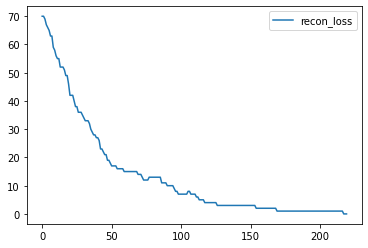

In [16]:
plot_loss.show()

tensor([[6, 4, 3, 1, 7, 2, 8, 5, 9],
        [8, 9, 5, 6, 3, 4, 2, 7, 1],
        [7, 2, 1, 9, 8, 5, 6, 3, 4],
        [1, 3, 6, 5, 4, 8, 9, 2, 7],
        [9, 8, 2, 3, 1, 7, 4, 6, 5],
        [5, 7, 4, 2, 9, 6, 1, 8, 3],
        [4, 6, 9, 7, 2, 3, 5, 1, 8],
        [2, 1, 7, 8, 5, 9, 3, 4, 6],
        [3, 5, 8, 4, 6, 1, 7, 9, 2]])


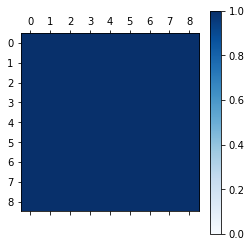

In [18]:
output = model(X[:1])
print((output[0].argmax(dim =-1) + 1).data)
heatmap = plt.matshow((output[0].argmax(dim =-1) == Y.argmax(dim=-1)), cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.colorbar(heatmap)

In [19]:
print(show_sudoku(Y))

tensor([[6, 4, 3, 1, 7, 2, 8, 5, 9],
        [8, 9, 5, 6, 3, 4, 2, 7, 1],
        [7, 2, 1, 9, 8, 5, 6, 3, 4],
        [1, 3, 6, 5, 4, 8, 9, 2, 7],
        [9, 8, 2, 3, 1, 7, 4, 6, 5],
        [5, 7, 4, 2, 9, 6, 1, 8, 3],
        [4, 6, 9, 7, 2, 3, 5, 1, 8],
        [2, 1, 7, 8, 5, 9, 3, 4, 6],
        [3, 5, 8, 4, 6, 1, 7, 9, 2]])
